<a href="https://colab.research.google.com/github/rtomek9/DS3001Group23CHDProject/blob/main/ashrita_project2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project #2
## Foundations of Machine Learning

The purpose of this project is to build predictive algorithms that predict the likelihood a person develops coronary heart disease (CHD). This is a subset of the data available for the Framingham Heart Study, a longitudinal data set following a sample of patients from Framingham, MA., that began in 1948 and is now on its third generation of participants.

The data include:
  
- `sex` : the recorded sex of the observationsm with 1 denoting an participant coded as male
- `age` : Age at the time of medical examination in years.
- `education`: A categorical variable of the participants education, with the levels: Some high school (1), high school/GED (2), some college/vocational school (3), college (4)
- `currentSmoker`: Current cigarette smoking at the time of examinations
- `cigsPerDay`: Number of cigarettes smoked each day
- `BPmeds`: Use of Anti-hypertensive medication at exam
- `prevalentStroke`: Prevalent Stroke (0 = free of disease)
- `prevalentHyp`: Prevalent Hypertensive. Subject was defined as hypertensive if treated
- `diabetes`: Diabetic according to criteria of first exam treated
- `totChol`: Total cholesterol (mg/dL)
- `sysBP`: Systolic Blood Pressure (mmHg)
- `diaBP`: Diastolic blood pressure (mmHg)
- `BMI`: Body Mass Index, weight (kg)/height (m)^2
- `heartRate`: Heart rate (beats/minute)
- `glucose`: Blood glucose level (mg/dL)
- `TenYearCHD` : The 10 year risk of coronary heart disease(CHD)

The data come in two files: `training_data.csv`, which you should use to build your models, and `testing_data.csv`, which you should use to test your models. The models must be trained on the training data and tested on the testing data, but providing both files allows you to experiment with your choices and iterate on model designs (e.g. if performance drops on the testing data, you know you're likely over-fitting).
  
You can use any of the tools presented in class: $k$ nearest neighbor, linear models, or decision trees. In principle, $k$ means clustering might also be helpful for looking for patterns in the data that the other methods might miss. Using canned versions of more advanced tools (boosting, bagging, random forests, neural networks, etc.) is unsporting at this point in the class and thus not allowed. You can be creative about transforming variables, or combining decision trees with linear models or $k$NN. Try something interesting. Fail extravagantly. The goal is to work on an intellectually interesting question that is similar to the tasks that data scientists are called on to do every day.
  
We will compare the groups' models to see if there are common trends or significant differences, and also to declare **The Winners** on the basis of whichever team achieves the highest $R^2$ on the testing data. I am mostly interested in the choices you make about cleaning the data, transforming variables, and building models, not the $R^2$, but it is a useful summary statistic to consider and motivate thoughtful choices. It might be the case that an $R^2$ of .8 is easy to achieve, or it might be the case that it's hard to break .3. Comparative model performance in this assignment is relative, not absolute: "Is model $A$ better or worse than model $B$?" rather than "Is model $A$ good enough to use in a clinical setting?".
  
This is supposed to be fairly "fun," so please do not turn it into a combinatorial nightmare of comparing thousands of model specifications. Settle on a strategy you think is promising, crank it out, and write up the results. Your time and energy are valuable, so learn to recognize when the marginal cost of another twenty minutes on a project exceeds the benefit in terms of improving the results and your grade.
  
## Paper format

The format of the paper should be:

  - Summary: A one paragraph description of the question, methods, and results (about 350 words).
  - Data: One to two pages discussing the data and key variables, and any challenges in reading, cleaning, and preparing them for analysis.
  - Results: Two to five pages providing visualizations, statistics, a discussion of your methodology, and a presentation of your main findings.
  - Conclusion: One to two pages summarizing the project, defending it from criticism, and suggesting additional work that was outside the scope of the project.
  - Appendix: If you have a significant number of additional plots or table that you feel are essential to the project, you can put any amount of extra content at the end and reference it from the body of the paper.

## Group Work and Submission

Each group will submit their work in a GitHub repo. The repo can be managed by a group member or arranged by github.com/DS3001.

Half of each student's grade is based on their commits to the repo. Each student is expected to do something
specific that contributes to the overall project outcome. Since commits are recorded explicitly by Git/GitHub,
this is observable. A student can contribute by cleaning data, creating visualizations, or writing about results,
but everyone has to do something substantial. A student's work doesn't need to make it into the final report
to be valuable and substantial, and fulfill the requirement to make a contribution to the project.

The other half of each student's grade is based on the report. Groups will work together on combining
results and writing up findings in a Jupyter notebook, using code chunks to execute Python commands and
markdown chunks to structure the paper and provide exposition. The notebook should run on Colab or
Rivana from beginning to end without any errors.*italicized text*

In [2]:
! git clone https://github.com/DS3001/project_chd/

Cloning into 'project_chd'...
remote: Enumerating objects: 13, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (2/2), done.
remote: Total 13 (delta 2), reused 1 (delta 1), pack-reused 10
Receiving objects: 100% (13/13), 635.39 KiB | 1.89 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
# importing the data set

df1 = pd.read_csv('/content/project_chd/fhs_train.csv')
df1.shape

(3180, 17)

In [20]:
# cleaning the data
### will drop any row with na's since dataset is quite large

df2 = df1.dropna()
row_nan_count = df2.isna().sum(axis=0)
print(row_nan_count)


Unnamed: 0         0
sex                0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64


cigsPerDay
0.0     1404
20.0     475
30.0     151
15.0     137
10.0      95
5.0       79
9.0       71
3.0       59
40.0      57
1.0       47
43.0      36
25.0      28
6.0       14
35.0      14
2.0       12
7.0        8
8.0        8
60.0       8
18.0       7
11.0       5
23.0       4
17.0       4
50.0       4
4.0        4
16.0       3
12.0       2
19.0       2
70.0       1
45.0       1
14.0       1
29.0       1
38.0       1
13.0       1
Name: count, dtype: int64

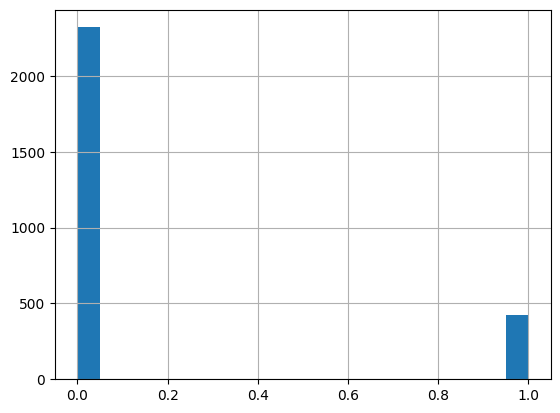

In [42]:
# scatter plot of the response variable
df2['TenYearCHD'].hist(bins = 20)

# looking at the spread of the response variable, it appears that there are way more observations for
# individuals who did not develop CHD versus those who did.

# CHD is a categorical variable (it may be better to do logistic regression)

df2.groupby("TenYearCHD").mean()

# looking at the averages across the variables for quantitative variables:
### total chol seems to have somewhat of a difference (a difference of 14 mg/dL)
### cigPerday is only different by 1 cigarette (maybe an outlier to get rid of)
### sysBP  has a large difference of 14
### diaBP does not have a large difference
### BMI, heartRate don't have a lot of differences
### glucose has a difference of 8

# looking at the averages across quantitative variables
### sex, age, education, and smoking status don't seem to have a large difference

## Make scatterplots of quantitative variables --> since we will be doing
## logistic regression, we want an s-shaped curve



[ 0.23994838  0.0290718  -0.0012863   0.01237135  0.00668803]
-0.03437610867456953


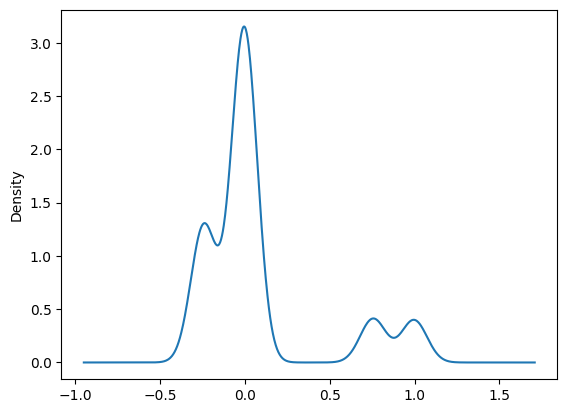

In [34]:
## LINEAR REGRESSION MODEL
# One-step multilinear regression: # only for quantitative variables
def mlr(X,y): # Multiple linear regression, matrix algebra approach
    XpX = X.T@X # Compute X'X
    Xpy = X.T@y # Compute X'y
    b = np.linalg.solve(XpX, Xpy) # Solve normal equations
    y_hat = X@b # Compute predictions
    residuals = y-y_hat # Compute residuals
    SSE =  np.inner(residuals,residuals) # Compute SSE
    rsq = 1 - SSE/np.inner( y-np.mean(y),y-np.mean(y)) # Compute Rsq
    return({'b':b,'y_hat':y_hat,'residuals':residuals,'rsq':rsq,'SSE':SSE})

y = df2["TenYearCHD"]
vars= df2.loc[:, ["prevalentHyp", "cigsPerDay", "totChol", "sysBP", "glucose"]]

# transforming the predictor variables -- REASON: because CHD is a categorical variable
# that can take values 0 and 1, it might be better to get everything in between that
# range so the coefficients makes sense

# Sine Transformation - NOT A GOOD MODEL - THE R^2 is -0.03?
X_sine = vars

X_sine["cigsPerDay"] = np.sin(X_sine["cigsPerDay"])
X_sine["totChol"] = np.sin(X_sine["totChol"])
X_sine["sysBP"] = np.sin(X_sine["sysBP"])
X_sine["glucose"] = np.sin(X_sine["glucose"])

reg = mlr(X_sine,y) # Run multiple linear regression
print(reg['b']) # Print coefficients
reg['residuals'].plot.kde() # Plot residuals
print(reg['rsq']) # R-squared measure of model fit

[ 0.1218107  -0.00774335  0.03249759]
0.030363443751756924


AttributeError: 'dict' object has no attribute 'predict'

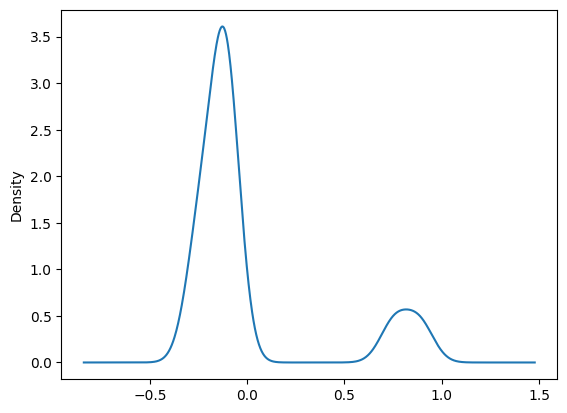

In [47]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

# Log Transformation - BETTER THAN SINE TRANSFORMATION
## LINEAR REGRESSION MODEL
# One-step multilinear regression: # only for quantitative variables
def mlr(X,y): # Multiple linear regression, matrix algebra approach
    XpX = X.T@X # Compute X'X
    Xpy = X.T@y # Compute X'y
    b = np.linalg.solve(XpX, Xpy) # Solve normal equations
    y_hat = X@b # Compute predictions
    residuals = y-y_hat # Compute residuals
    SSE =  np.inner(residuals,residuals) # Compute SSE
    rsq = 1 - SSE/np.inner( y-np.mean(y),y-np.mean(y)) # Compute Rsq
    return({'b':b,'y_hat':y_hat,'residuals':residuals,'rsq':rsq,'SSE':SSE})

y = df2["TenYearCHD"]
vars= df2.loc[:, ["prevalentHyp", "totChol", "sysBP",]]
X_log = vars
X_log["totChol"] = np.log(X_log["totChol"])
X_log["sysBP"] = np.log(X_log["sysBP"])

reg = mlr(X_log,y) # Run multiple linear regression
print(reg['b']) # Print coefficients
reg['residuals'].plot.kde() # Plot residuals
print(reg['rsq']) # R-squared measure of model fit

y_pred = reg.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))


In [30]:
## LOGISTIC REGRESSION MODEL

# One-step multilinear regression: # only for quantitative variables
def mlr(X,y): # Multiple linear regression, matrix algebra approach
    XpX = X.T@X # Compute X'X
    Xpy = X.T@y # Compute X'y
    b = np.linalg.solve(XpX, Xpy) # Solve normal equations
    y_hat = X@b # Compute predictions
    residuals = y-y_hat # Compute residuals
    SSE =  np.inner(residuals,residuals) # Compute SSE
    rsq = 1 - SSE/np.inner( y-np.mean(y),y-np.mean(y)) # Compute Rsq
    return({'b':b,'y_hat':y_hat,'residuals':residuals,'rsq':rsq,'SSE':SSE})

X = df2.loc[:,['totChol','sysBP', 'glucose'] ]
y = df2['TenYearCHD']
reg = mlr(X,y)
#print('MLR coefficients: ', reg['b']) # Same values!

from sklearn.linear_model import LinearRegression # Import linear regression model

## Dummy variables:
X2 = pd.get_dummies(df2['prevalentHyp'], dtype=float) # Create dummies
y_train = pd.get_dummies(df2['TenYearCHD'], dtype=float)
## Concatenate:
X = pd.concat([X,X2],axis=1) # Concatenate engineered features
X.head()

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_curve, auc

X.columns = X.columns.astype(str)
model = LogisticRegression()
model.fit(X, y)


# Evaluate the model
y_pred = model.predict(X)
accuracy = accuracy_score(y, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))

print("Confusion Matrix:\n", confusion_matrix(y, y_pred))
print("\nClassification Report:\n", classification_report(y, y_pred))

Accuracy: 84.77%
Confusion Matrix:
 [[2311    9]
 [ 409   15]]

Classification Report:
               precision    recall  f1-score   support

           0       0.85      1.00      0.92      2320
           1       0.62      0.04      0.07       424

    accuracy                           0.85      2744
   macro avg       0.74      0.52      0.49      2744
weighted avg       0.81      0.85      0.79      2744



/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
